Analysis of the advantage gained by an adversarial relayer $A$, where the relayer tries to reuse the same validator signatures as many times as possible before the validator is kicked out of the active set. 

probability if every ethereum transaction for a whole polkadot session was SubmitInitial 0.7499997787963366


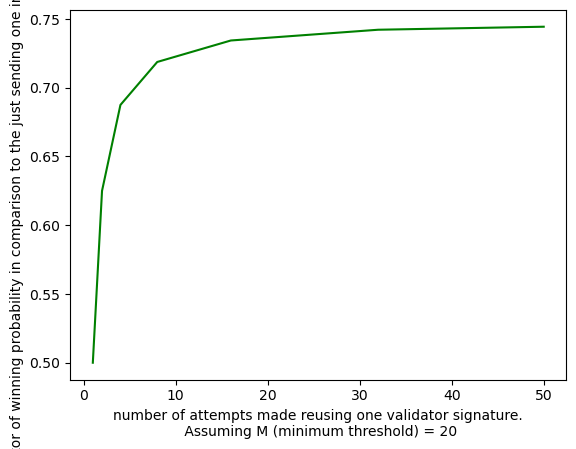

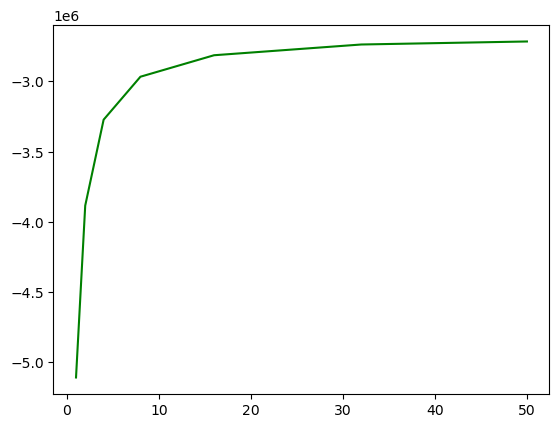

In [98]:
import math
import numpy as np
import matplotlib.pyplot as plt

total_dot_marketcap = 5000000000
max_slashable_of_min_backed_validator =-10000000

def advantage(k, M):
    res=0
    naive=0
    k = int(k)
    for i in range(1,k+1):
        res = res + 1/2**(M + 1 + 2 * math.ceil(math.log2(i)))
        naive = naive + 1/2**(M+1)
    factor = res / (1/2**(M))
    expected_gain = res*total_dot_marketcap + (1-res) * max_slashable_of_min_backed_validator
    return (factor, expected_gain)

x = np.linspace(1, 50, 49)
y = np.asarray(x, dtype = 'int')    
#print(y)

print("probability if every ethereum transaction for a whole polkadot session was SubmitInitial", advantage(1200000, 20)[0])

z=[]
for i in y:
    z.append(advantage(i,9)[0])

z1=[]
for i in y:
    z1.append(advantage(i,9)[1])

z2=[]
for i in y:
    z2.append(i)

plt.xlabel('number of attempts made reusing one validator signature.\n Assuming M (minimum threshold) = 20')
plt.ylabel('expected gains and costs')
plt.figure(1)
plt.plot(y, z, color='g', label='expected gains')

plt.xlabel('number of attempts made reusing one validator signature.\n Assuming M (minimum threshold) = 20')
plt.ylabel('factor of winning probability in comparison to the just sending one initial submit')
plt.figure(2)
plt.plot(y, z1, color='g', label='factor of winning chance')




Griefing Attack V1: Malicious adversary trying to spam SubmitInitial to surge the number of checks and consequently the costs of SubmitFinal for other Honest relayers. 

[ 1  6 11 17 22 28 33 39 44 50]
[2640000.0, 4080000.0, 4560000.0, 5040000.0, 5040000.0, 5040000.0, 5520000.0, 5520000.0, 5520000.0, 5520000.0]


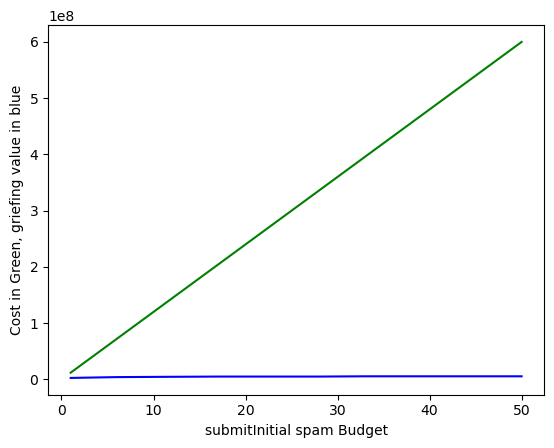

In [79]:
import math
import numpy as np
import matplotlib.pyplot as plt

def submitFinalCostIncreaseFactor(spam_initial_budget_per_validator, submit_initial_cost, submit_final_cost_constant, K):
    spam_cost = spam_initial_budget_per_validator * submit_initial_cost * 200
    default_submit_final_cost = 24 * K * submit_final_cost_constant 
    new_submit_final_cost = (K + 1 + 2*math.ceil(math.log2 (spam_initial_budget_per_validator))) * submit_final_cost_constant * 24
    griefing_factor = new_submit_final_cost/default_submit_final_cost
    griefing_value = griefing_factor * default_submit_final_cost
    return spam_cost, griefing_factor, griefing_value

x = np.linspace(1, 50, 10)
y = np.asarray(x, dtype = 'int')    
print(y)
#print("probability if every ethereum transaction for a whole polkadot session was SubmitInitial", advantage(1200000, 20)[0])

z0=[]
for i in y:
    z0.append(submitFinalCostIncreaseFactor(i,60000,10000,10)[0])

#z1=[]
#for i in y:
#    z1.append(submitFinalCostIncreaseFactor(i,60,10,10)[1])
#print(z1)

z2=[]
for i in y:
    z2.append(submitFinalCostIncreaseFactor(i,60000,10000,10)[2])
print(z2)

plt.xlabel('submitInitial spam Budget')
plt.ylabel('Cost in Green, griefing value in blue')
#plt.plot(y, z1, color='r', label='costs')
plt.plot(y, z0, color='g', label='cost')
#plt.plot(y, z1, color='r', label='factor')
plt.plot(y, z2, color='b', label='value')



[   1    6   11   16   21   26   31   36   41   46   51   56   61   66
   71   76   81   86   91   96  101  106  111  116  121  126  131  136
  141  146  151  156  161  166  171  176  181  186  191  196  201  206
  211  216  221  226  231  236  241  246  251  256  261  266  271  276
  281  286  291  296  301  306  311  316  321  326  331  336  341  346
  351  356  361  366  371  376  381  386  391  396  401  406  411  416
  421  426  431  436  441  446  451  456  461  466  471  476  481  486
  491  496  501  506  511  516  521  526  531  536  541  546  551  556
  561  566  571  576  581  586  591  596  601  606  611  616  621  626
  631  636  641  646  651  656  661  666  671  676  681  686  691  696
  701  706  711  716  721  726  731  736  741  746  751  756  761  766
  771  776  781  786  791  796  801  806  811  816  821  826  831  836
  841  846  851  856  861  866  871  876  881  886  891  896  901  906
  911  916  921  926  931  936  941  946  951  956  961  966  971  976
  981 

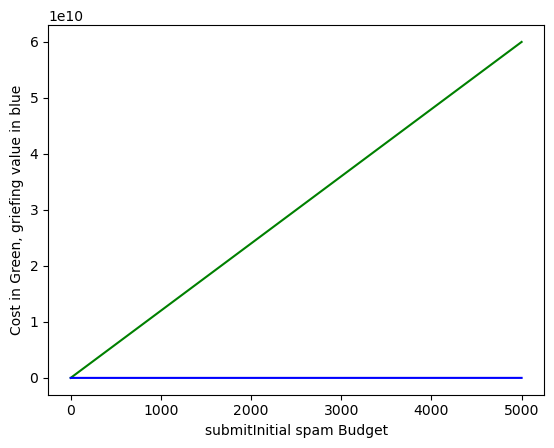

In [88]:
import math
import numpy as np
import matplotlib.pyplot as plt

def submitFinalCostIncreaseFactor(spam_initial_budget_per_validator, submit_initial_cost, submit_final_cost_constant, K):
    spam_cost = spam_initial_budget_per_validator * submit_initial_cost * 200
    default_submit_final_cost = 24 * K * submit_final_cost_constant 
    new_submit_final_cost = (K + 1 + 2*math.ceil(math.log2 (spam_initial_budget_per_validator))) * submit_final_cost_constant * 24
    griefing_factor = new_submit_final_cost/default_submit_final_cost
    griefing_value = griefing_factor * default_submit_final_cost
    return spam_cost, griefing_factor, griefing_value

x = np.linspace(1, 5000, 1000)
y = np.asarray(x, dtype = 'int')    
print(y)
#print("probability if every ethereum transaction for a whole polkadot session was SubmitInitial", advantage(1200000, 20)[0])

z0=[]
for i in y:
    z0.append(submitFinalCostIncreaseFactor(i,60000,10000,10)[0])

z1=[]
for i in y:
    z1.append(submitFinalCostIncreaseFactor(i,60,10,10)[1])
print(z1)

z2=[]
for i in y:
    z2.append(submitFinalCostIncreaseFactor(i,60000,10000,10)[2])
print(z2)

plt.xlabel('submitInitial spam Budget')
plt.ylabel('Cost in Green, griefing value in blue')
#plt.plot(y, z1, color='r', label='costs')
plt.plot(y, z0, color='g', label='cost')
#plt.plot(y, z1, color='r', label='factor')
plt.plot(y, z2, color='b', label='value')

